'''Fixed acidity: The non-volatile acids present in the wine.
Volatile acidity
Citric acid,Residual sugar,Chlorides,Free sulfur dioxide,Total sulfur dioxide,Density,pH,Sulphates,Alcohol,Quality are the key features of wine quality data set'''


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [28]:
# Import the required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the wine quality data set
data = pd.read_csv('winequality-red.csv')  # Replace 'wine_quality.csv' with the actual file path or URL

# Split the data into features (X) and target variable (y)
X = data.drop('quality', axis=1)
y = data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

# Predict the wine quality for the test set
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.71      0.74      0.72       130
           6       0.63      0.70      0.66       132
           7       0.64      0.55      0.59        42
           8       0.00      0.00      0.00         5

    accuracy                           0.66       320
   macro avg       0.33      0.33      0.33       320
weighted avg       0.63      0.66      0.64       320



In [32]:
#Q2
# Impute missing values with the mean
data.fillna(data.mean(), inplace=True)

# Impute missing values with the median
data.fillna(data.median(), inplace=True)

# Impute missing values with the mode
data.fillna(data.mode().iloc[0], inplace=True)
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [38]:
#Q3
df1=pd.read_csv("stud.csv")
df1.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#Q4
Feature engineering is the process of selecting, creating, and transforming variables (features) in a dataset to improve the performance and interpretability of a machine learning model. In the context of the student performance data set, let's discuss the process of feature engineering and how variables were selected and transformed for the model.


The specific selection and transformation of variables for the model will depend on the specific objectives of the analysis and the insights gained from exploratory data analysis. It is essential to iteratively experiment with different approaches, evaluate their impact on the model's performance, and refine the feature engineering process accordingly to build the most effective and informative model.

(array([[1599.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [1599.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [1599.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [1599.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [1599.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [1397.,  198.,    4.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [ 607.,  535.,  246.,  139.,   54.,   16.,    0.,    0.,    0.,
            2.],
        [1599.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [1599.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [1599.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [1599.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [1599.,    0.

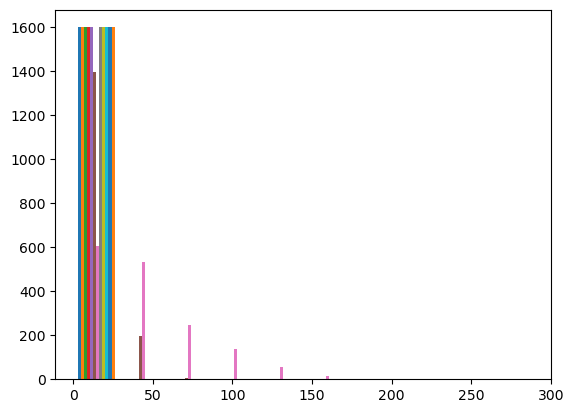

In [41]:
#Q5
plt.hist(df)


In [46]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [51]:
from sklearn.preprocessing import MinMaxScaler

# Select the columns to normalize (assuming 'column1' and 'column2' are the columns to normalize)
columns_to_normalize = ['volatile acidity', 'density']
scaler = MinMaxScaler()
data=scaler.fit_transform(df)
print(data)


[[0.24778761 0.39726027 0.         ... 0.13772455 0.15384615 0.4       ]
 [0.28318584 0.52054795 0.         ... 0.20958084 0.21538462 0.4       ]
 [0.28318584 0.43835616 0.04       ... 0.19161677 0.21538462 0.4       ]
 ...
 [0.15044248 0.26712329 0.13       ... 0.25149701 0.4        0.6       ]
 [0.11504425 0.35958904 0.12       ... 0.22754491 0.27692308 0.4       ]
 [0.12389381 0.13013699 0.47       ... 0.19760479 0.4        0.6       ]]


In [54]:
#Q6
from sklearn.decomposition import PCA


# Load the wine quality data set (assuming it is stored in a DataFrame called 'data')
data = pd.read_csv('winequality-red.csv')  # Replace 'wine_quality.csv' with the actual file path or URL

# Separate the features from the target variable (assuming 'quality' is the target variable)
X = data.drop('quality', axis=1)

# Create a PCA object with the desired number of components
n_components = 3  # Specify the number of components you want to retain after dimensionality reduction
pca = PCA(n_components=n_components)

# Fit the PCA model to the data and transform the data
X_pca = pca.fit_transform(X)

# Create a DataFrame with the transformed data and print it
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)])
print(X_pca_df)


            PC1        PC2       PC3
0    -13.224905  -2.023900 -1.126821
1     22.037724   4.408322 -0.310378
2      7.162673  -2.501461 -0.581868
3     13.430063  -1.951122  2.634040
4    -13.224905  -2.023900 -1.126821
...         ...        ...       ...
1594   1.129111  16.313102 -1.860069
1595   9.489984  21.627525 -1.986558
1596  -3.431354  14.271243 -1.750719
1597   1.132878  16.316167 -2.134414
1598  -3.874377   3.126348 -1.874149

[1599 rows x 3 columns]
